# 9.4. The Monty Hall Problem

- work out The Monty Hall Problem by simulation
  - Three doors
  - Behind one of the doors is a fancy car
  - At least one of the other two doors must have a goat behind it. ==> just say two goats
  - The contestant makes an initial choice, but that door isn’t opened.
  - Monty opens one of the other two doors to reveal a goat.
  - More about the game: [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem)

### <font color='darkred'>Question: Switch or not?</font>

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://introdsm.org/_images/monty_hall_goat.png")

## 9.4.1. The Solution

- The chance that the car is behind the originally chosen door is 1/3.
- The car is behind either the originally chosen door or the door that still remains closed. 
- Therefore, the chance that the car is behind the door that remains is 2/3.
- Therefore, the contestant **should switch**.

#### Not everybody is convinced that the contestant should switch. 

In [8]:
from IPython.display import Image
# from IPython.core.display import HTML 
Image(url= "../../images/Monty_Hall_Problem_-_Standard_probabilities.svg.png", width=500)

##### switch or not? probability among the three possible selections, switch has probability of 2/3 car:

**Solution presented by vos Savant in marilynvossavant.com from Parade Magazine in 1990/1991**

| Behind door 1	| Behind door 2	| Behind door 3	| Result if staying at door #1	| Result if switching to the door offered
|--- | --- | ---| ---| ---|
| Goat	| Goat	| **Car** |	Wins goat	| **Wins car** |
| Goat	| **Car**	| Goat | Wins goat | **Wins car** |
| **Car** | Goat | Goat	| **Wins car**	| Wins goat |

## 9.4.2. Simulation

#### Step 1: What to Simulate
For each play we will simulate what’s behind all three doors:

- the one the contestant first picks
- the one that Monty opens
- the remaining door


#### Step 2: Simulating One Play
simulating one play of the game

**The goats**: start by setting up an array goats that contains the two goats.

In [9]:
from datascience import *
goats = make_array('first goat', 'second goat')
goats

##### we careated an array of goats

array(['first goat', 'second goat'],
      dtype='<U11')

- identify which goat is selected and which one is revealed behind the open door. 
- The function other_goat takes one goat and returns the other.



In [10]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [11]:
other_goat('watermelon')

In [12]:
##### test other_goat()
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')


### The None keyword is used to define a null value, or no value at all.
### None is not the same as 0, False, or an empty string. None is a data type of its own (NoneType) and only None can be None.

('second goat', 'first goat', None)

**The options**: The array hidden_behind_doors contains the three things that are behind the doors.

In [13]:
import numpy as np
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

#### simulation

The game starts with the contestant choosing one door at random. In doing so, the contestant makes a random choice from among the first goat, the second goat, and the car.

- If the contestant happens to pick one of the goats, then the other goat is revealed and the car is behind the remaining door.
- If the contestant happens to pick the car, then Monty reveals one of the goats and the other goat is behind the remaining door.
- We'll create monty_hall_game function: 
  - the contestant’s guess
  - what Monty reveals when he opens a door
  - what remains behind the other door



In [23]:
def monty_hall_game():
    contestant_guess = np.random.choice(hidden_behind_doors)   ##### the guess pick one

    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
    
    return [contestant_guess, revealed, other_goat(revealed)]

In [28]:
monty_hall_game()

['second goat', 'first goat', 'car']

#### Step 3: Number of Repetitions
 - 10,000 repetitions

#### Step 4: Simulating Multiple Repetitions
- simulate a list of three values each time
- treat this simulated list as a row of a table

In [16]:
games = Table(['Guess', 'Revealed', 'Remaining'])     ##### note this creates labels
games

Guess,Revealed,Remaining


In [31]:
for i in np.arange(10000):
    games.append(monty_hall_game())   ### appended the returned monty_hall_game

In [32]:
games.show(3)
# games

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car


## 9.4.3. Visualization

In [33]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,13244
first goat,13279
second goat,13477


In [34]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,26756
first goat,6542
second goat,6702


- The contestant is twice as likely to get the car if she switches than if she sticks with her original choice.

In [35]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabel(0, 'Item').relabel(1, 'Original Door').relabel(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,13244,26756
first goat,13279,6542
second goat,13477,6702


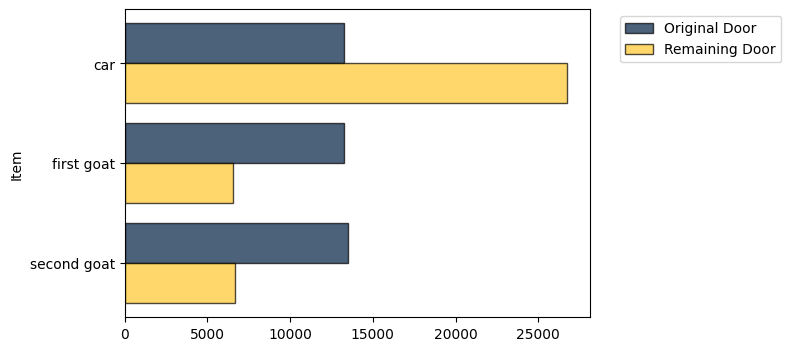

In [36]:
%matplotlib inline
combined.barh(0)